In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../Data/airplanes_pt_2.csv')
df.head()

/Users/devin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,6,7,9,10,16,18,19,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,...,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,publication_date,event_year,event_month
0,0080125X00106,Accident,SEA08CA056,2007-12-31,"Santa Ana, CA",United States,SNA,John Wayne - Orange County,Non-Fatal,Substantial,...,Instructional,NaN,NaN,NaN,2.0,VMC,LANDING,02/28/2008,2007,12
1,0080129X00122,Accident,CHI08CA057,2007-12-30,"Alexandria, MN",United States,AXN,Chandler Field Airport,Non-Fatal,Substantial,...,Personal,NaN,NaN,NaN,1.0,VMC,TAKEOFF,02/28/2008,2007,12
2,0080114X00045,Accident,LAX08FA043,2007-12-30,"Paso Robles, CA",United States,PRB,Paso Robles Airport,Fatal(1),Substantial,...,Personal,1.0,NaN,NaN,NaN,VMC,MANEUVERING,06/20/2014,2007,12
3,0080109X00032,Accident,NYC08FA071,2007-12-30,"Cherokee, AL",United States,NaN,NaN,Fatal(3),Substantial,...,Other Work Use,3.0,0.0,0.0,0.0,VMC,MANEUVERING,01/15/2009,2007,12
4,0080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,NaN,NaN,Fatal(2),Destroyed,...,Personal,2.0,0.0,0.0,0.0,VMC,MANEUVERING,12/03/2008,2007,12


In [3]:
df.shape

(147345, 29)

In [4]:
df = df.drop(columns = 'schedule')

In [5]:
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,...,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,publication_date,event_year,event_month
0,0080125X00106,Accident,SEA08CA056,2007-12-31,"Santa Ana, CA",United States,SNA,John Wayne - Orange County,Non-Fatal,Substantial,...,Instructional,NaN,NaN,NaN,2.0,VMC,LANDING,02/28/2008,2007,12
1,0080129X00122,Accident,CHI08CA057,2007-12-30,"Alexandria, MN",United States,AXN,Chandler Field Airport,Non-Fatal,Substantial,...,Personal,NaN,NaN,NaN,1.0,VMC,TAKEOFF,02/28/2008,2007,12
2,0080114X00045,Accident,LAX08FA043,2007-12-30,"Paso Robles, CA",United States,PRB,Paso Robles Airport,Fatal(1),Substantial,...,Personal,1.0,NaN,NaN,NaN,VMC,MANEUVERING,06/20/2014,2007,12
3,0080109X00032,Accident,NYC08FA071,2007-12-30,"Cherokee, AL",United States,NaN,NaN,Fatal(3),Substantial,...,Other Work Use,3.0,0.0,0.0,0.0,VMC,MANEUVERING,01/15/2009,2007,12
4,0080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,NaN,NaN,Fatal(2),Destroyed,...,Personal,2.0,0.0,0.0,0.0,VMC,MANEUVERING,12/03/2008,2007,12


In [6]:
df = df.drop(columns = 'registration_number')

In [7]:
df.shape

(147345, 27)

In [8]:
df = df.drop(columns = 'country')

In [9]:
df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'airport_code', 'airport_name', 'injury_severity',
       'aircraft_damage', 'aircraft_category', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'publication_date', 'event_year',
       'event_month'],
      dtype='object')

In [10]:
df = df.drop(columns = ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',
                        'total_uninjured', 'event_date'])

In [11]:
df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'location',
       'airport_code', 'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'far_description',
       'purpose_of_flight', 'weather_condition', 'broad_phase_of_flight',
       'publication_date', 'event_year', 'event_month'],
      dtype='object')

In [12]:
df['make'] = df['make'].str.lower()

In [13]:
df['make'].value_counts()

cessna             49860
piper              32053
beech               9994
bell                4088
mooney              2930
                   ...  
jabiru aircraft        1
mikowski               1
vancraft               1
israel ind             1
sampson                1
Name: make, Length: 5618, dtype: int64

In [164]:
df_2 = df

In [165]:
df_2 = df_2.drop(columns = ['event_id', 'accident_number', 'airport_code',
                           'airport_name', 'far_description', 'amateur_built'])

In [166]:
df_2 = df_2.drop(columns = 'purpose_of_flight')

In [167]:
df_2 = df_2.drop(columns = 'publication_date')

In [168]:
df_2.columns

Index(['investigation_type', 'location', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'make', 'model', 'number_of_engines',
       'engine_type', 'weather_condition', 'broad_phase_of_flight',
       'event_year', 'event_month'],
      dtype='object')

In [169]:
df_2.dtypes

investigation_type        object
location                  object
injury_severity           object
aircraft_damage           object
aircraft_category         object
make                      object
model                     object
number_of_engines        float64
engine_type               object
weather_condition         object
broad_phase_of_flight     object
event_year                 int64
event_month                int64
dtype: object

In [170]:
df_2 = df_2.drop(columns = 'aircraft_category')

In [189]:
df_2.isnull().sum()

investigation_type       0
injury_severity          0
aircraft_damage          0
make                     0
model                    0
weather_condition        0
broad_phase_of_flight    0
event_year               0
event_month              0
dtype: int64

In [172]:
outcomes = ['Non-Fatal', 'Incident', 'Unavailable']

df_2['injury_severity'] = df_2['injury_severity'].apply(lambda x: 0 if x in outcomes else 1)

In [173]:
df_2.injury_severity.value_counts(normalize = True)

0    0.838196
1    0.161804
Name: injury_severity, dtype: float64

In [174]:
df_2 = df_2.drop(columns = 'location')

In [175]:
df_2.aircraft_damage.value_counts(normalize = True)

Substantial    0.727211
Destroyed      0.244800
Minor          0.027990
Name: aircraft_damage, dtype: float64

In [176]:
df_2.aircraft_damage = df_2.aircraft_damage.fillna('Unknown')

In [177]:
df_2.weather_condition = df_2.weather_condition.fillna('Unknown')

In [178]:
df_2.broad_phase_of_flight = df_2.weather_condition.fillna('Unknown')

In [179]:
df_2.investigation_type = df_2.investigation_type.fillna('Unknown')

In [181]:
df_2 = df_2.drop(columns = ['number_of_engines', 'engine_type'])

In [182]:
df_2 = df_2.dropna()

In [183]:
df_2['make'].value_counts().sum()

147233

In [184]:
top_10 = list(df_2['make'].value_counts().head(10).index)

In [185]:
top_10

['cessna',
 'piper',
 'beech',
 'bell',
 'mooney',
 'boeing',
 'grumman',
 'bellanca',
 'aeronca',
 'hughes']

In [186]:
df_2 = df_2[df_2.make.isin(top_10)]

In [187]:
df_2.shape

(110103, 9)

In [188]:
df_2['make'].value_counts(normalize = True)

cessna      0.452840
piper       0.291118
beech       0.090770
bell        0.037129
mooney      0.026611
boeing      0.026493
grumman     0.023224
bellanca    0.018392
aeronca     0.017420
hughes      0.016003
Name: make, dtype: float64

In [190]:
df_2.to_csv('../../Data/top_10_makes.csv')

In [191]:
top_models = list(df_2['model'].value_counts().head(10).index)

In [192]:
top_models

['PA-28',
 '150',
 '172',
 '152',
 'PA-22',
 '182',
 'PA-18',
 'PA-24',
 '180',
 'PA-25']

In [193]:
df_3 = df_2[df_2.model.isin(top_models)]

In [194]:
df_3.shape

(29833, 9)

In [195]:
df_3['model'].value_counts(normalize = True)

PA-28    0.195790
150      0.172125
172      0.141286
152      0.090236
PA-22    0.080582
182      0.078336
PA-18    0.067174
PA-24    0.066738
180      0.055945
PA-25    0.051788
Name: model, dtype: float64

In [196]:
df_3.to_csv('../../Data/top_10_models.csv')

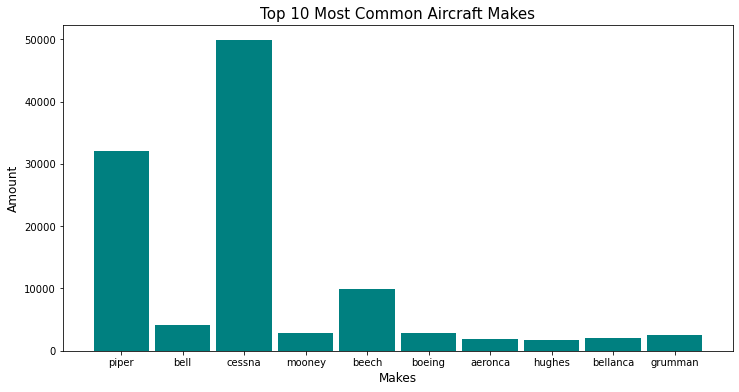

In [231]:
plt.figure(figsize = (12, 6))
plt.hist(df_2['make'], color = 'teal', rwidth = .9, bins=np.arange(11)-.5)

plt.title('Top 10 Most Common Aircraft Makes', fontsize = 15)
plt.xlabel('Makes', fontsize = 12)
plt.ylabel('Amount', fontsize = 12);
plt.savefig('top_10_makess.png', bbox_inches = 'tight');

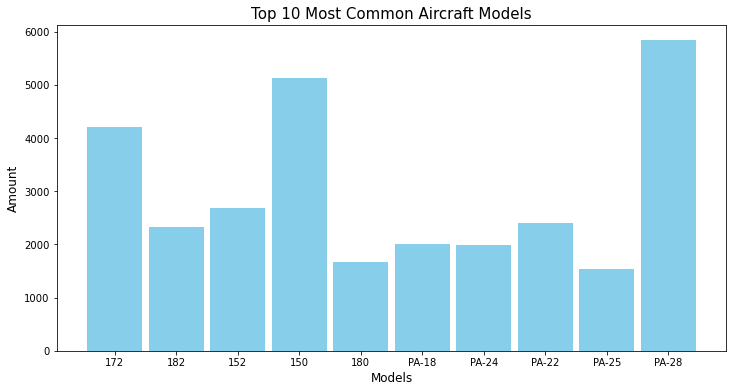

In [229]:
plt.figure(figsize = (12, 6))
plt.hist(df_3['model'], color = 'skyblue', rwidth = .9, bins=np.arange(11)-.5)

plt.title('Top 10 Most Common Aircraft Models', fontsize = 15)
plt.xlabel('Models', fontsize = 12)
plt.ylabel('Amount', fontsize = 12);

plt.savefig('top_10_models.png', bbox_inches = 'tight');